In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_complete = pd.read_csv('/kaggle/input/30000-spotify-songs/spotify_songs.csv')

In [11]:
df = df_complete.sample(n=150, random_state=42)

In [12]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,42.506667,0.673127,0.671897,4.753333,-7.364127,0.533333,0.117503,0.183499,0.109747,0.194317,0.509687,118.596667,222869.620000
std,24.951428,0.129161,0.174115,3.794975,3.833450,0.500559,0.111616,0.211754,0.251790,0.150732,0.249127,25.056464,59953.630947
min,0.000000,0.170000,0.098600,0.000000,-36.509000,0.000000,0.023700,0.000006,0.000000,0.023900,0.038800,67.104000,75333.000000
25%,22.250000,0.588500,0.560250,1.000000,-9.041250,0.000000,0.042975,0.022175,0.000000,0.098050,0.297250,97.894500,188086.750000
50%,46.500000,0.692500,0.672000,5.000000,-6.789500,1.000000,0.063850,0.114500,0.000021,0.136500,0.534000,123.415000,215517.000000
75%,59.000000,0.757500,0.804000,8.000000,-4.894500,1.000000,0.153250,0.262750,0.006513,0.257750,0.708750,132.050250,254183.250000
max,91.000000,0.930000,0.993000,11.000000,-0.846000,1.000000,0.609000,0.924000,0.979000,0.870000,0.966000,184.019000,448696.000000


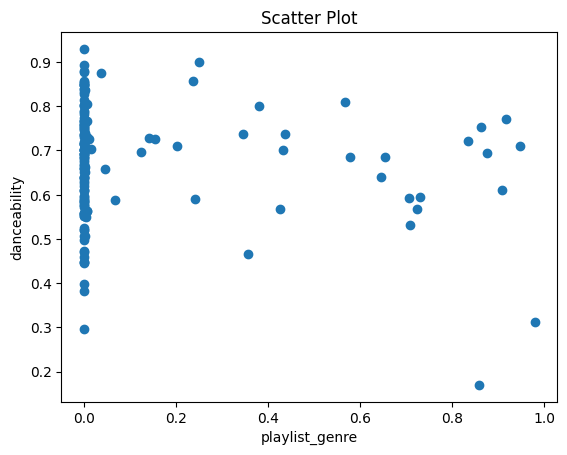

In [15]:
plt.scatter(df['instrumentalness'], df['danceability'])
plt.title('Scatter Plot')
plt.xlabel('playlist_genre')
plt.ylabel('danceability')
plt.show()

Text(0, 0.5, 'Energy')

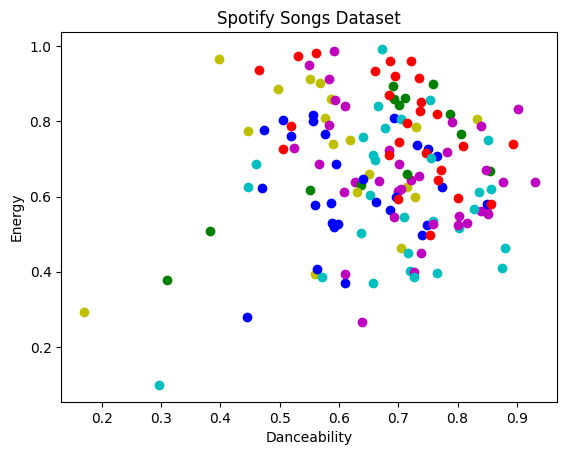

In [14]:
genres = {'edm': 'r', 'latin': 'g', 'pop': 'b', 'r&b': 'c', 'rap': 'm', 'rock': 'y'}

fig, ax = plt.subplots()

for index, row in df.iterrows():
    ax.scatter(row['danceability'], row['energy'], color=genres[row['playlist_genre']])

ax.set_title('Spotify Songs Dataset')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')

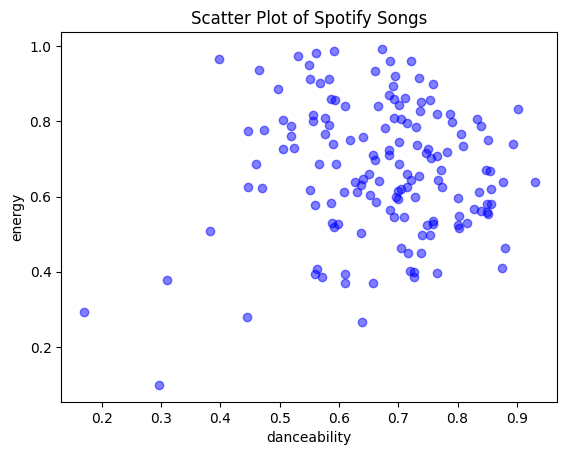

In [17]:

x_column = 'danceability'
y_column = 'energy'

fig, ax = plt.subplots()

ax.scatter(df[x_column], df[y_column], c='blue', alpha=0.5)

ax.set_title('Scatter Plot of Spotify Songs')
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

plt.show()


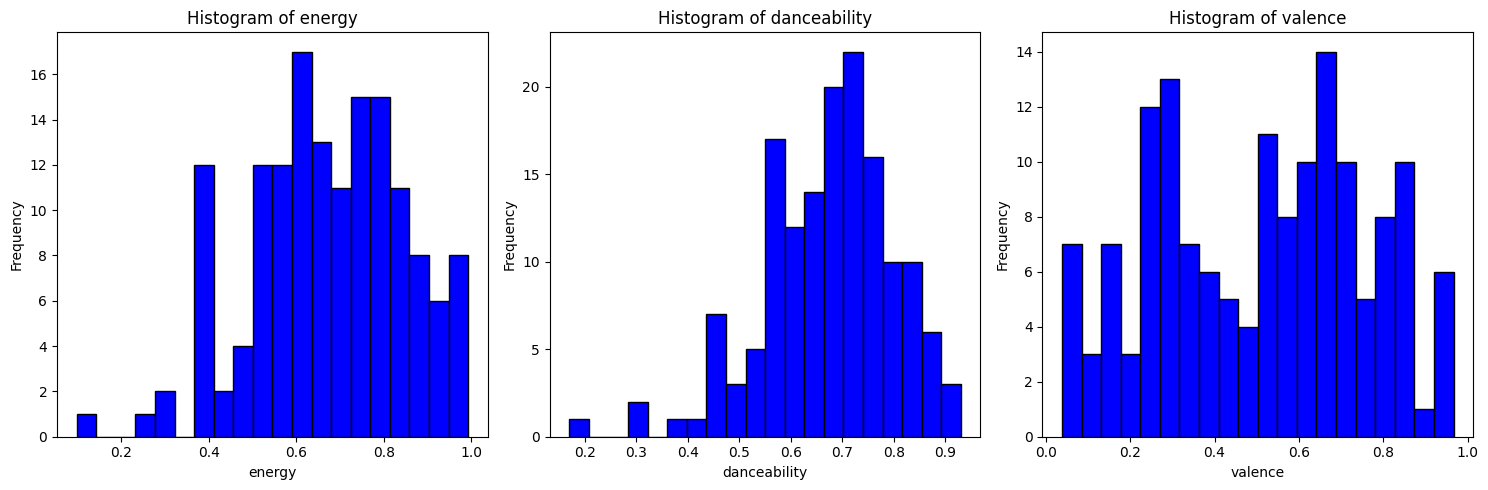

In [37]:
columns_to_plot = ['energy', 'danceability', 'valence']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    axs[i].hist(df[column], bins=20, color='blue', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    
plt.tight_layout()

plt.show()

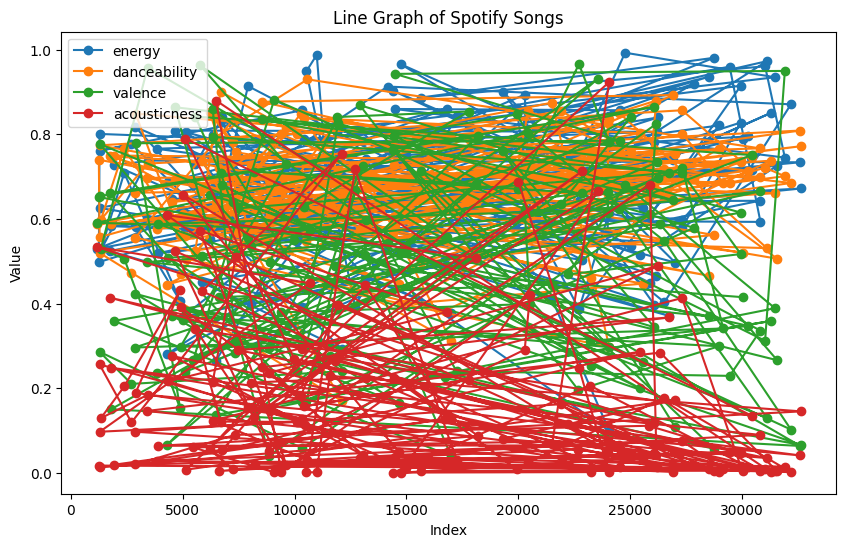

In [38]:
columns_to_plot = ['energy', 'danceability', 'valence', 'acousticness']

fig, ax = plt.subplots(figsize=(10, 6))

for column in columns_to_plot:
    ax.plot(df[column], label=column, marker='o')

ax.set_title('Line Graph of Spotify Songs')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()

plt.show()

In [21]:
import seaborn as sns

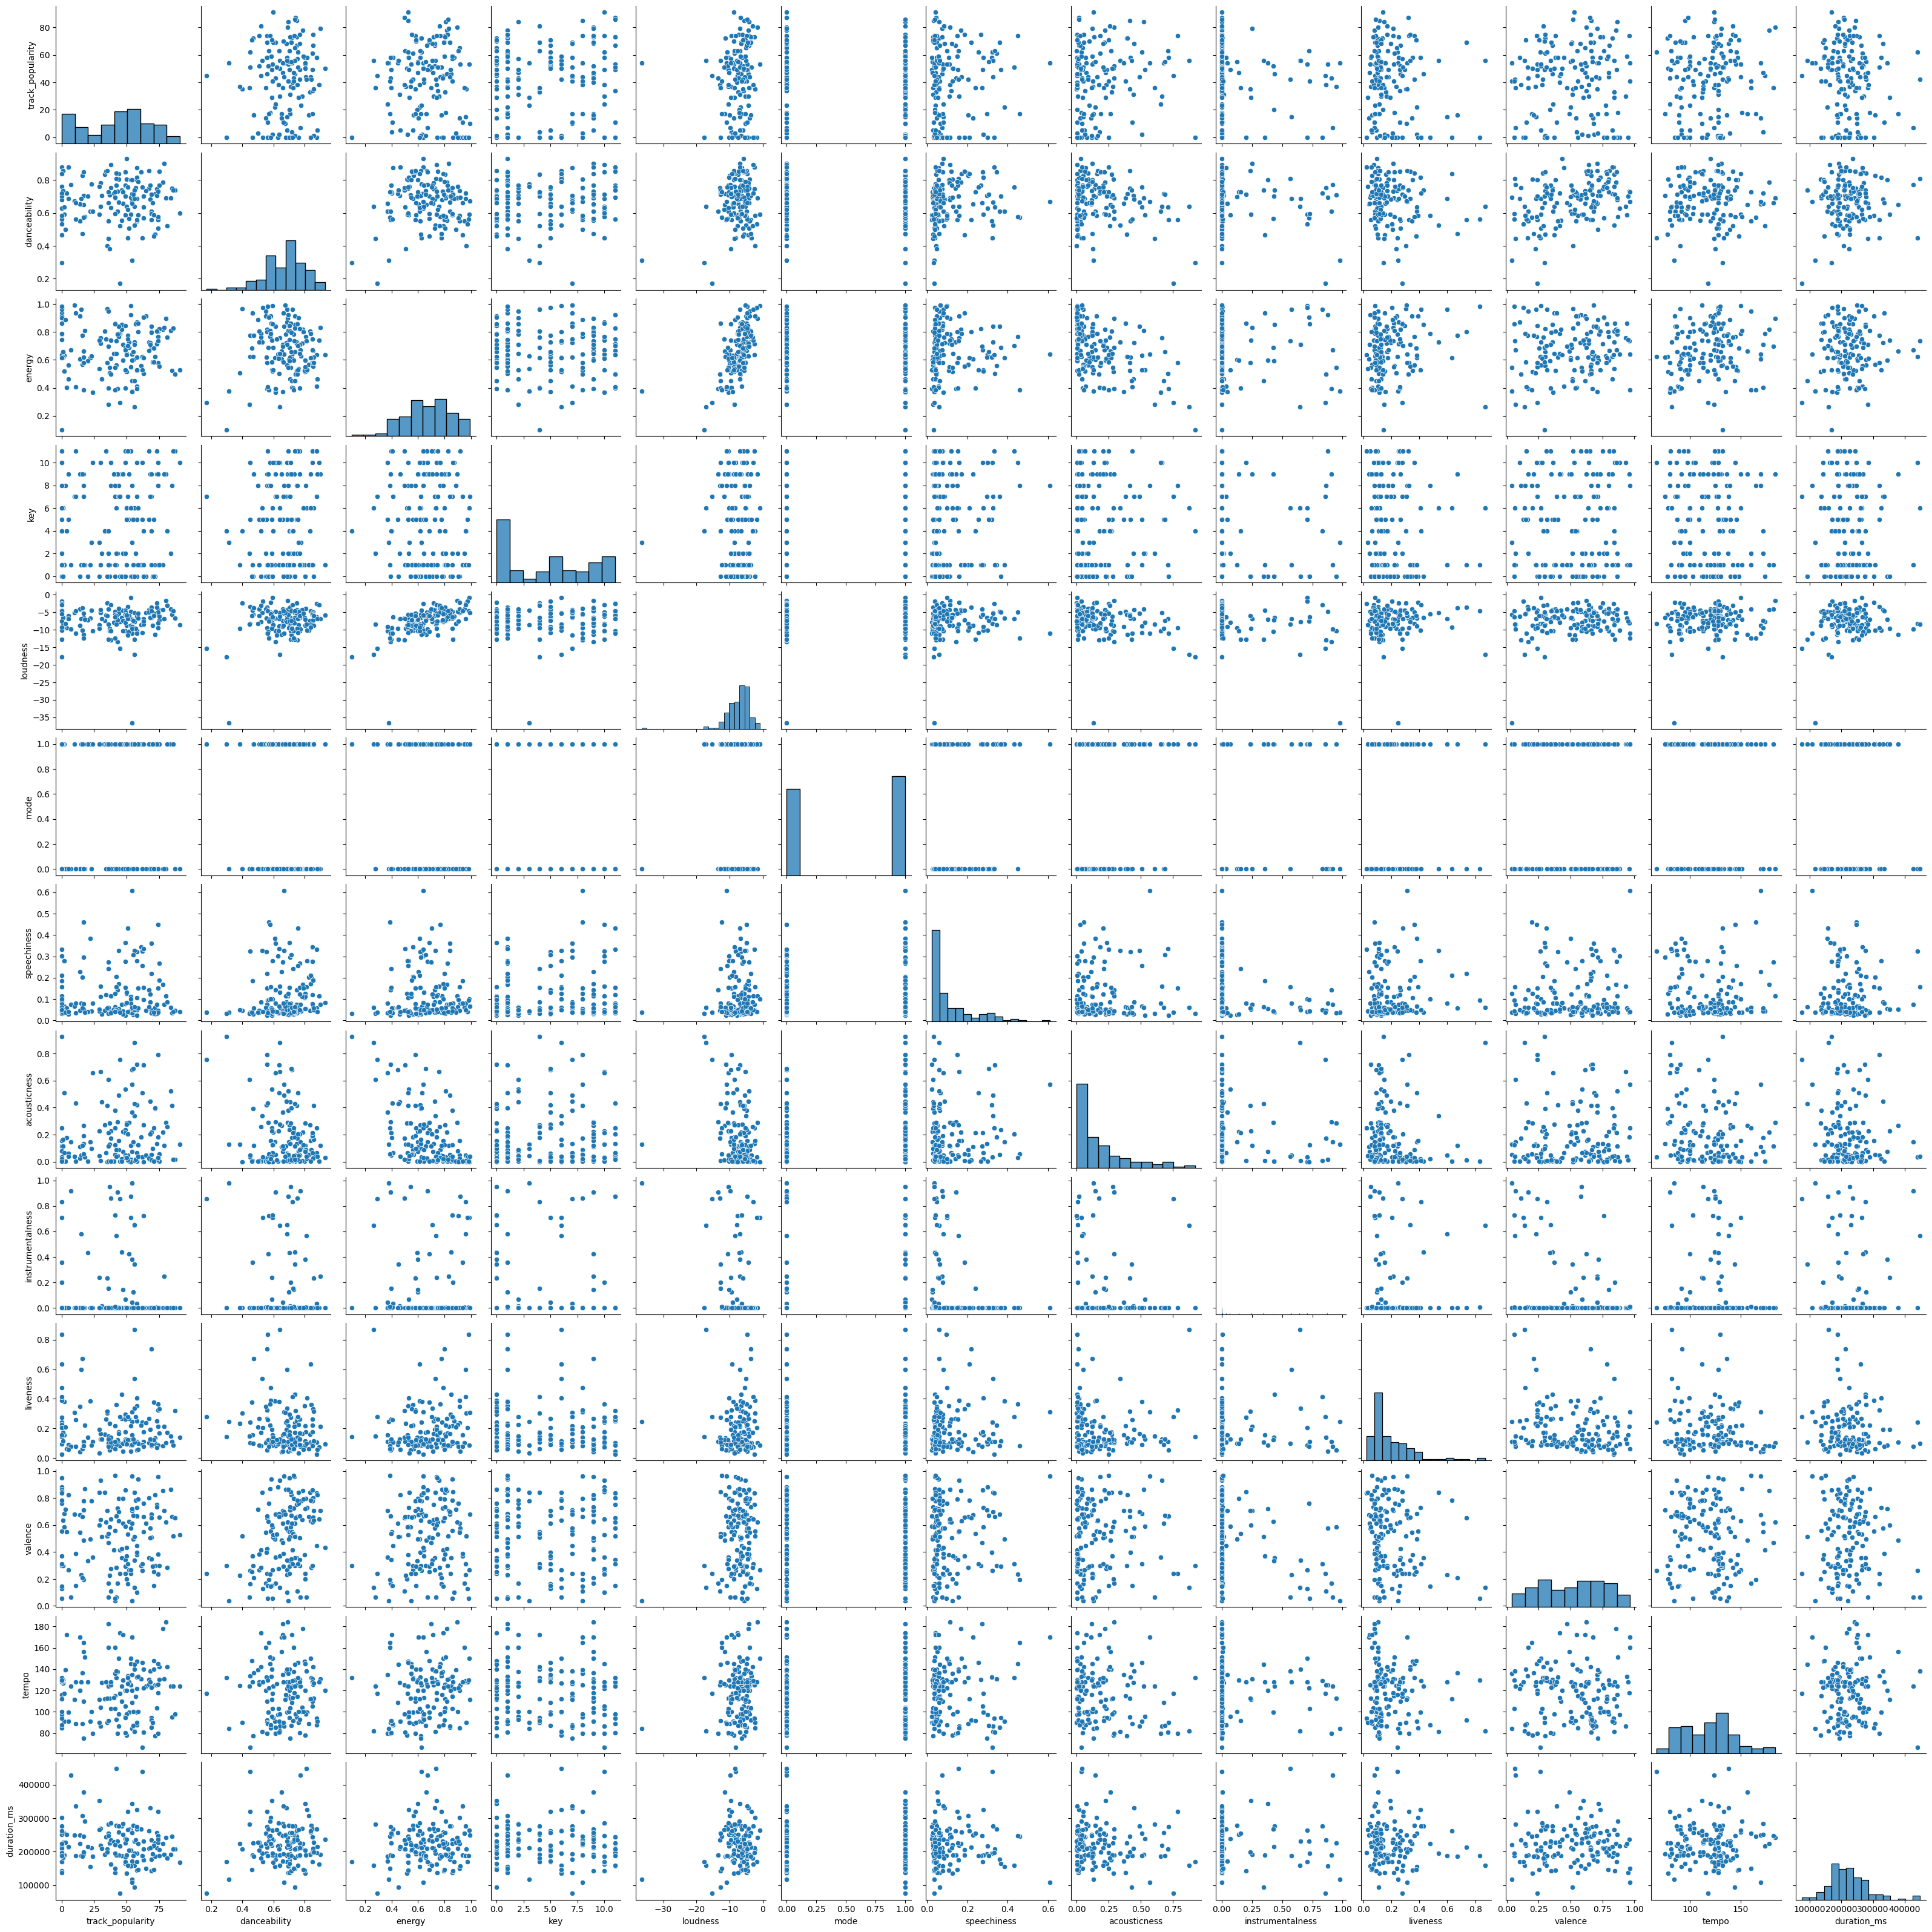

In [22]:
sns.pairplot(df)

/tmp/ipykernel_47/1390870518.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df, alpha=1, ax=ax)


array([[<Axes: xlabel='track_popularity', ylabel='track_popularity'>,
        <Axes: xlabel='danceability', ylabel='track_popularity'>,
        <Axes: xlabel='energy', ylabel='track_popularity'>,
        <Axes: xlabel='key', ylabel='track_popularity'>,
        <Axes: xlabel='loudness', ylabel='track_popularity'>,
        <Axes: xlabel='mode', ylabel='track_popularity'>,
        <Axes: xlabel='speechiness', ylabel='track_popularity'>,
        <Axes: xlabel='acousticness', ylabel='track_popularity'>,
        <Axes: xlabel='instrumentalness', ylabel='track_popularity'>,
        <Axes: xlabel='liveness', ylabel='track_popularity'>,
        <Axes: xlabel='valence', ylabel='track_popularity'>,
        <Axes: xlabel='tempo', ylabel='track_popularity'>,
        <Axes: xlabel='duration_ms', ylabel='track_popularity'>],
       [<Axes: xlabel='track_popularity', ylabel='danceability'>,
        <Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceabili

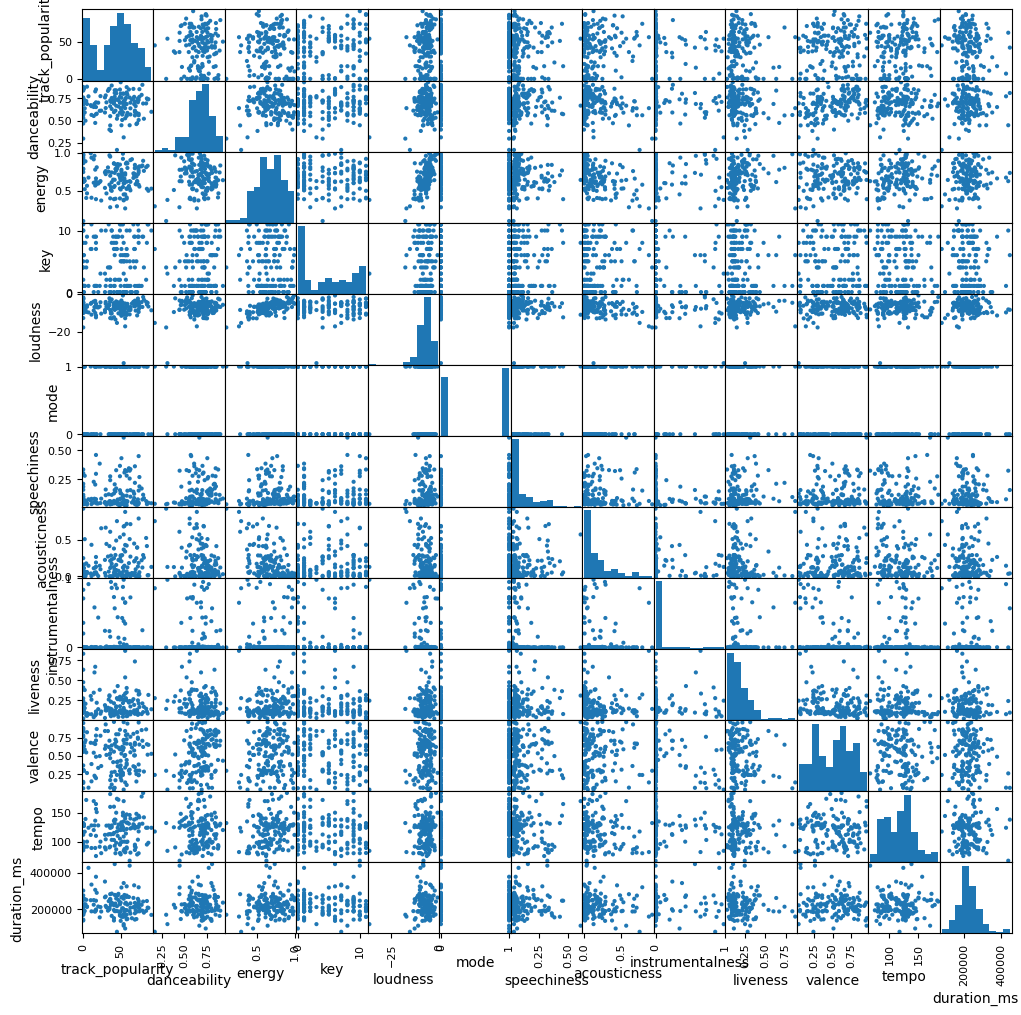

In [23]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df, alpha=1, ax=ax)